## Replicats One AI Agent

We leverage big data for superior predictive accuracy, using state-of-the-art deep learning, reinforcement learning, and specialized foundation models. Our approach incorporates Graph Neural Networks (GNNs), Vector Error Correction Model (VECM), Support Vector Machines (SVMs), transformer-based time series models, and frameworks like Keras / TimesFM (Time Series Foundation Model) for implementation.

## Backtesting

### Historical Backtest


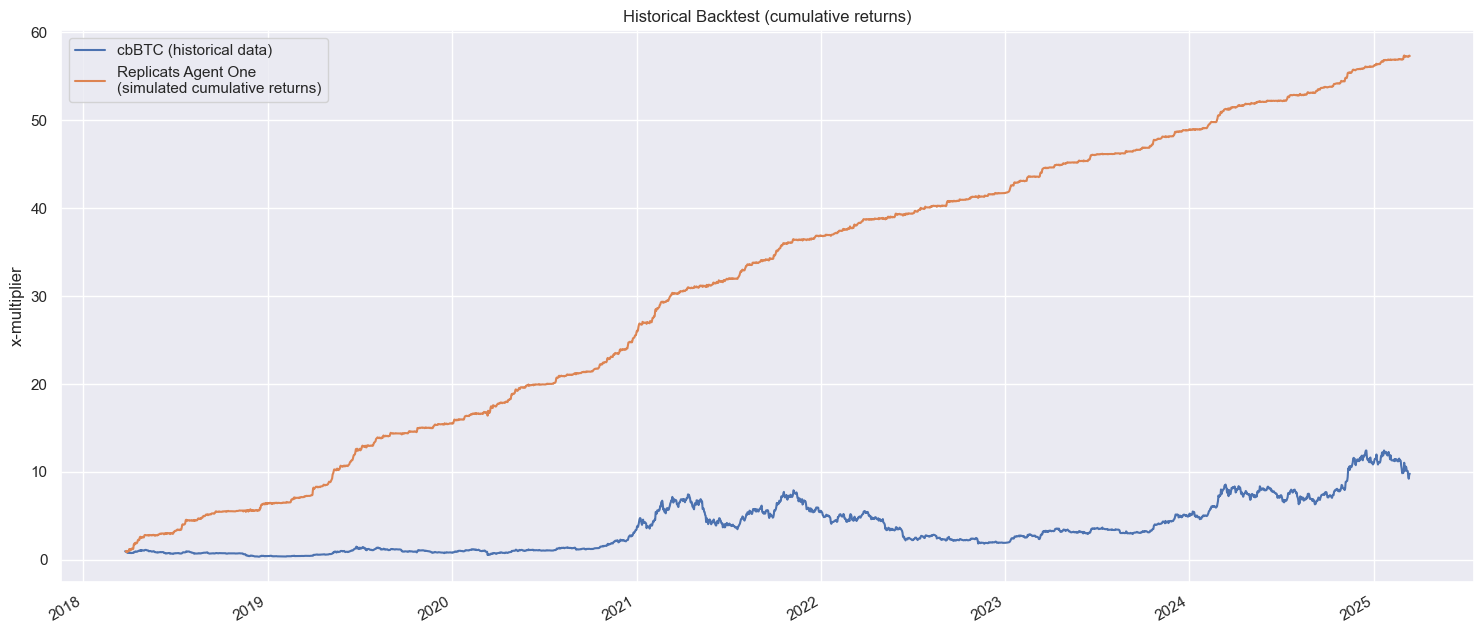

In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme()

# load log-retuns for cbBTC and RCAT portifolio 
# (simulated "a posteriori" with historical market data)
path = os.path.realpath(os.path.join(os.path.abspath(''), 'log_returns_002.parquet'))
df = pd.read_parquet(path)

# get cumulative returns (i.e. portolio evolution)
df['cbBTC'] = df[['cbBTC.ln']].apply(np.exp).cumprod()
df['RCAT'] = df[['RCAT.ln']].apply(np.exp).cumprod() 

# plot normalized cumulative returns for:
#  a) cbBTC holding portifolio
#  b) RCAT portifolio
ax = df.plot(y=['cbBTC','RCAT'], figsize=(15, 6.5), 
             title='Historical Backtest (cumulative returns)', xlabel='', ylabel='x-multiplier')
plt.tight_layout()
ax.legend(['cbBTC (historical data)', 'Replicats Agent One \n(simulated cumulative returns)']);

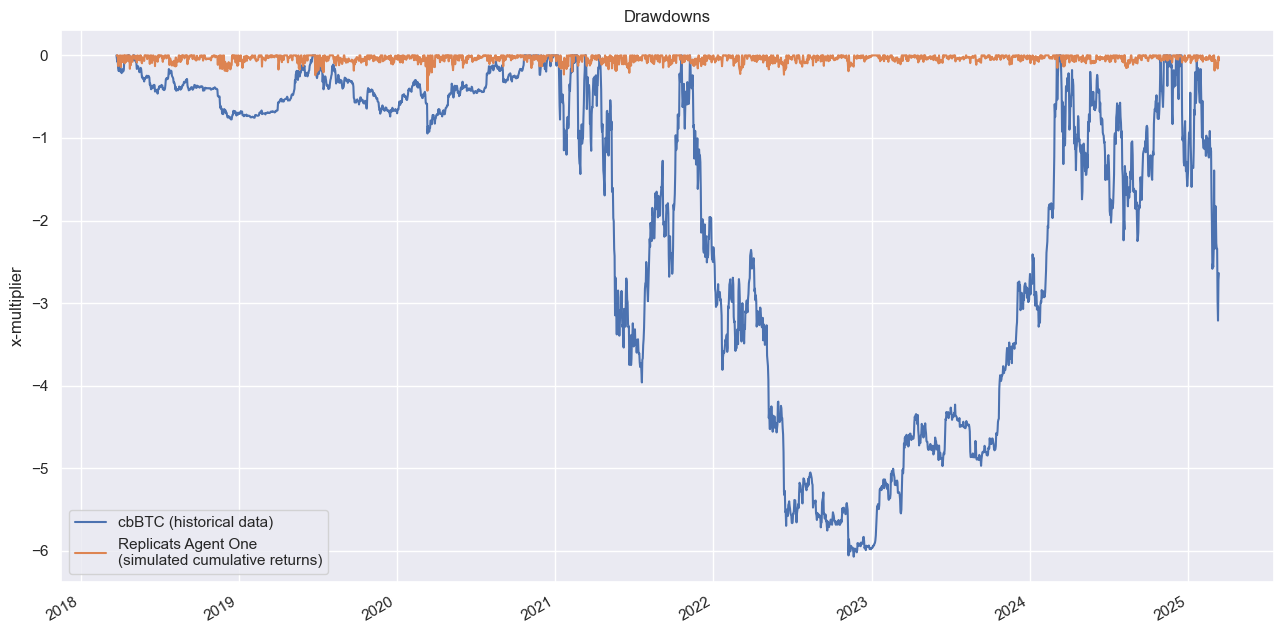

In [51]:
# evaluates downdowns
from backtest import drawdowns
df['cbBTC.drawdown'], _, _, _ = drawdowns(df['cbBTC.ln'])
df['RCAT.drawdown'], _ , _, _ = drawdowns(df['RCAT.ln'])

ax = df.plot(y=['cbBTC.drawdown','RCAT.drawdown'], \
        figsize=(13, 6.5), title='Drawdowns', xlabel='', ylabel='x-multiplier')
plt.tight_layout()
ax.legend(['cbBTC (historical data)', 'Replicats Agent One \n(simulated cumulative returns)']);

### Risk-Adjusted Return Metrics

In [53]:
# risk free rate
rf=0.0442
# rolling window
window = 63

from backtest import calculate_ratios
ratios_cbBTC = calculate_ratios(df['cbBTC.ln'], risk_free_rate=rf, rolling_window=window)
ratios_RCAT = calculate_ratios(df['RCAT.ln'], risk_free_rate=rf, rolling_window=window)

import tabulate
data = [
    ['Risk-Adjusted Return Metrics', 'cbBTC (historical)','😺 Replicats Agent One'],
    ['Sharpe Ratio', f"{ratios_cbBTC['sharpe_ratio']:.4f}", f"{ratios_RCAT['sharpe_ratio']:.4f}"],
    ['Sortino Ratio', f"{ratios_cbBTC['sortino_ratio']:.4f}", f"{ratios_RCAT['sortino_ratio']:.4f}"],
    ['Calmar Ratio', f"{ratios_cbBTC['calmar_ratio']:.4f}", f"{ratios_RCAT['calmar_ratio']:.4f}"],
    ['Treynor Ratio', f"{ratios_cbBTC['treynor_ratio']:.4f}", f"{ratios_RCAT['treynor_ratio']:.4f}"],
    ['Information Ratio', f"{ratios_cbBTC['information_ratio']:.4f}", f"{ratios_RCAT['information_ratio']:.4f}"],
    ['Omega Ratio', f"{ratios_cbBTC['omega_ratio']:.4f}", f"{ratios_RCAT['omega_ratio']:.4f}"],
    
    ['Market Risk Metrics','cbBTC (historical)','😺 Replicats Agent One'],
    ['Annualized Return', f"{ratios_cbBTC['annualized_return']:.2%}", f"{ratios_RCAT['annualized_return']:.2%}"],
    ['Annualized Volatility', f"{ratios_cbBTC['annualized_volatility']:.2%}", f"{ratios_RCAT['annualized_volatility']:.2%}"],
    ['Maximum Drawdown', f"{ratios_cbBTC['max_drawdown']:.4f}", f"{ratios_RCAT['max_drawdown']:.4f}"],
    ['Beta', f"{ratios_cbBTC['beta']:.4f}", f"{ratios_RCAT['beta']:.4f}"],
]
display(tabulate.tabulate(data, tablefmt='html'))


Risk-Adjusted Return Metrics,cbBTC (historical),😺 Replicats Agent One
Sharpe Ratio,0.4211,2.2489
Sortino Ratio,0.4095,3.4801
Calmar Ratio,0.0158,1.7965
Treynor Ratio,0.2842,1.5327
Information Ratio,8.0450,42.9643
Omega Ratio,1.0425,1.3410
Market Risk Metrics,cbBTC (historical),😺 Replicats Agent One
Annualized Return,9.53%,72.62%
Annualized Volatility,67.10%,23.52%
Maximum Drawdown,-6.0153,-0.4042


### Rolling risk-adjusted returns

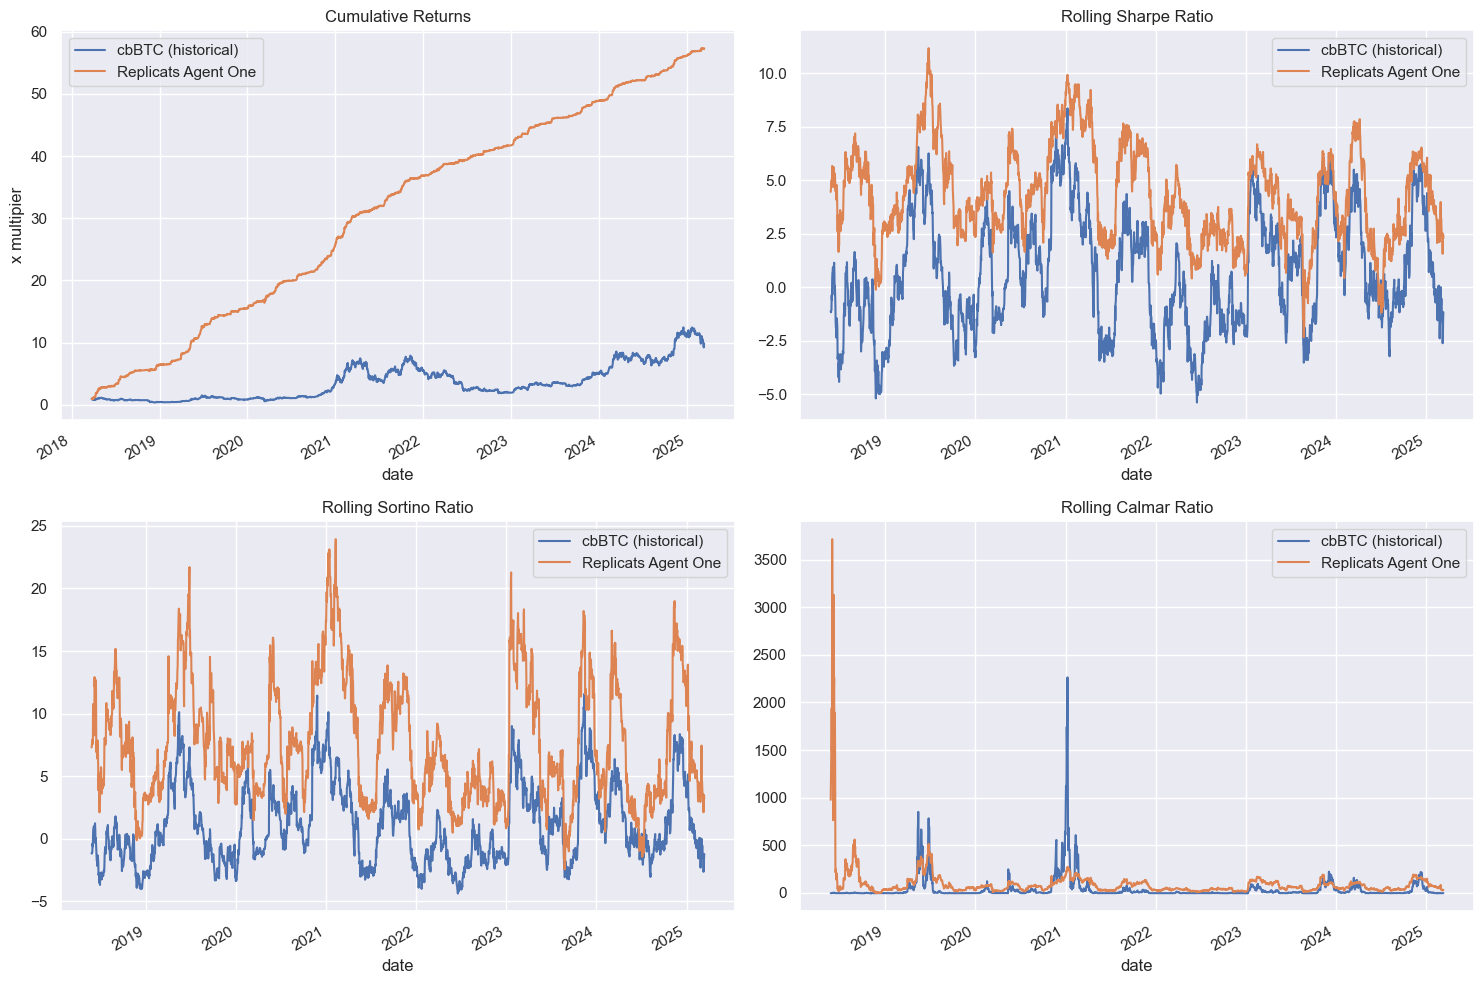

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot cumulative returns
df['cbBTC'].plot(ax=ax1, title='Cumulative Returns')
df['RCAT'].plot(ax=ax1)
ax1.set_ylabel('x multipier')
ax1.legend(["cbBTC (historical)", "Replicats Agent One"], loc='upper left')

# Plot rolling ratios
ratios_cbBTC['rolling_sharpe_ratio'].plot(ax=ax2, title='Rolling Sharpe Ratio')
ratios_RCAT['rolling_sharpe_ratio'].plot(ax=ax2)
ax2.legend(["cbBTC (historical)", "Replicats Agent One"])
        
ratios_cbBTC['rolling_sortino_ratio'].plot(ax=ax3, title='Rolling Sortino Ratio')
ratios_RCAT['rolling_sortino_ratio'].plot(ax=ax3) #, ylim=(-10, 25))
ax3.legend(["cbBTC (historical)", "Replicats Agent One"])

ratios_cbBTC['rolling_calmar_ratio'].plot(ax=ax4, title='Rolling Calmar Ratio')
ratios_RCAT['rolling_calmar_ratio'].plot(ax=ax4) #, ylim=(-10, 500))
ax4.legend(["cbBTC (historical)", "Replicats Agent One"])

plt.tight_layout()
plt.show()

## Risk Metrics



In [56]:
from backtest import calculate_var_metrics, calculate_tracking_metrics

confidence_level = 0.95

# rebuild actual price series from cumulative returns
px_last = 96900.99 #  @Feb, 13th

df['cbBTC.ln'] = df['cbBTC.ln'].bfill(axis=0).ffill(axis=0)
df['RCAT.ln'] = df['RCAT.ln'].bfill(axis=0).ffill(axis=0)

var_cbBTC = calculate_var_metrics(df['cbBTC.ln'], confidence_level)
var_RCAT = calculate_var_metrics(df['RCAT.ln'], confidence_level)
te = calculate_tracking_metrics(df['RCAT.ln'], df['cbBTC.ln'])

data = [
    ['Value at Risk', 'cbBTC (historical)','😺 Replicats Agent One'],
    [f"VaR ({confidence_level:.0%})", f"{px_last*(np.exp(var_cbBTC['historical_var'])-1):.2f}", f"{px_last*(np.exp(var_RCAT['historical_var'])-1):.2f}"],
    [f"MVaR ({confidence_level:.0%})", f"{px_last*(np.exp(var_cbBTC['conditional_var'])-1):.2f}", f"{px_last*(np.exp(var_RCAT['conditional_var'])-1):.2f}"],
    [f"CVaR ({confidence_level:.0%})", f"{px_last*(np.exp(var_cbBTC['modified_var'])-1):.2f}", f"{px_last*(np.exp(var_RCAT['modified_var'])-1):.2f}"],
    ['', 'Benchmark Comparison',''],
    ['Tracking Error', f"{te['tracking_error']:.2f}",''],
    ['Information Ratio', f"{te['information_ratio']:.2f}",''],
    ['Alpha', f"{te['alpha']:.2f}",''],
    ['Beta', f"{te['beta']:.2f}",''],
    ['r2', f"{te['r_squared']:.2f}",''],
    ['Up Capture', f"{te['up_capture']:.2%}",''],
]
display(tabulate.tabulate(data, tablefmt='html'))

Value at Risk,cbBTC (historical),😺 Replicats Agent One
VaR (95%),-5162.19,-414.75
MVaR (95%),-7736.73,-1444.50
CVaR (95%),-3292.27,2128.15
,Benchmark Comparison,
Tracking Error,0.64,
Information Ratio,0.39,
Alpha,0.54,
Beta,0.11,
r2,0.09,
Up Capture,18.82%,


## Stressed Risk

Ever wonder how sophisticated traders predict potential losses in volatile crypto markets? 

Monte Carlo simulations are powerful statistical tools that generate thousands of random price paths to model possible future outcomes. When combined with Geometric Brownian Motion (GBM), they capture the random walk nature of crypto prices.

Why this matters for YOUR portfolio:

Stressed Value at Risk (VaR) uses these simulations to estimate maximum potential losses under extreme market conditions. Unlike standard VaR, stressed VaR incorporates historical crisis periods to prepare for worst-case scenarios.

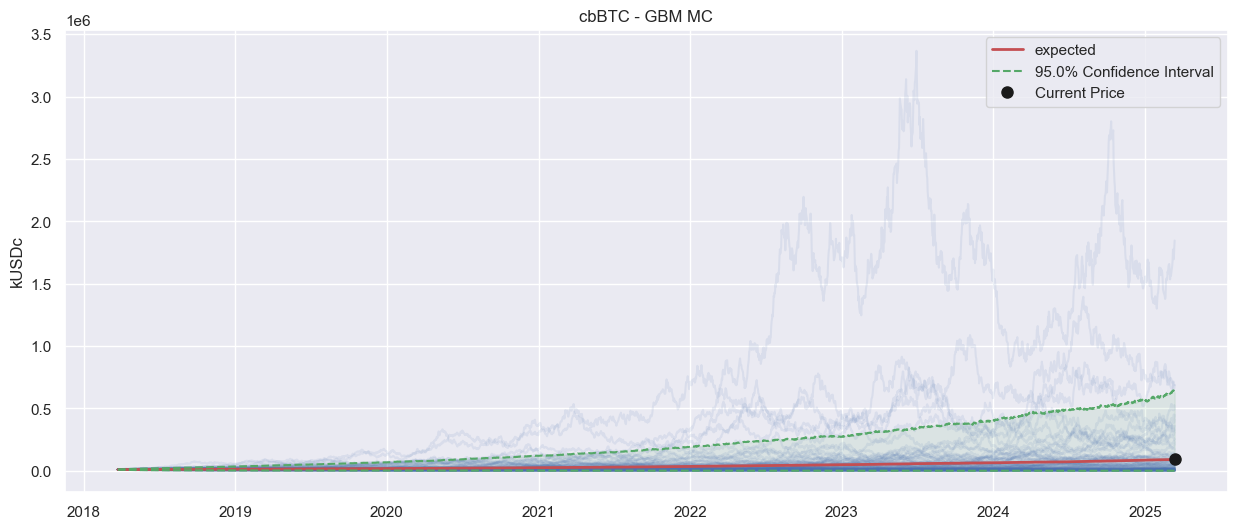

In [57]:
from backtest import monte_carlo_backtest

# plot MC cbBTC
times = df.index.values
mcvar_cbBTC = monte_carlo_backtest(df['cbBTC.ln'], px_last, 10000, confidence_level, times, 'cbBTC - GBM MC')

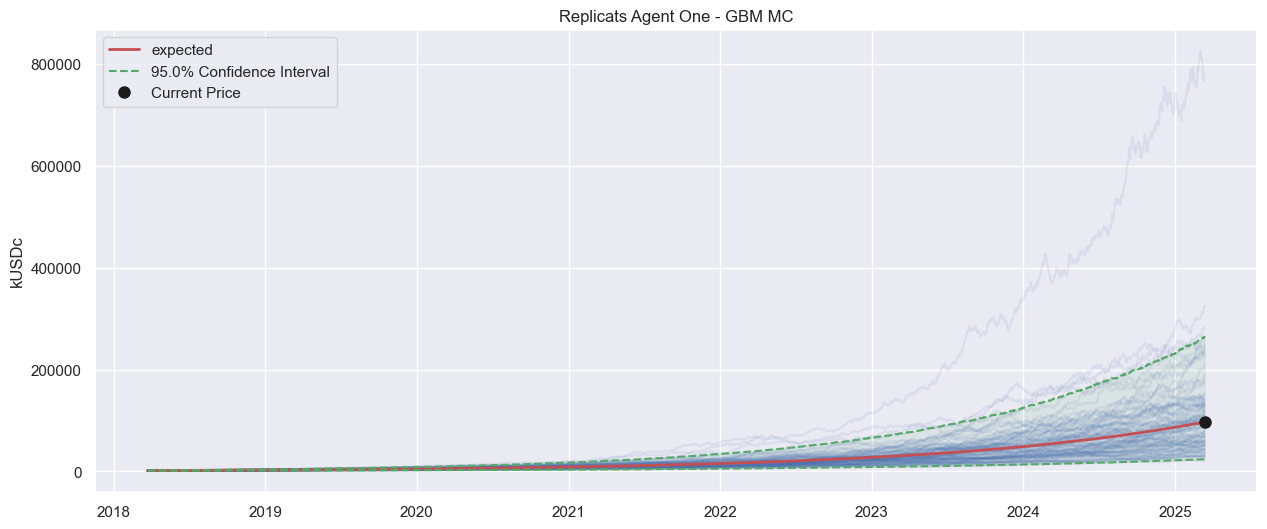

In [58]:
# plot MC RCAT
times = df.index.values
mcvar_RCAT = monte_carlo_backtest(df['RCAT.ln'], px_last, 10000, confidence_level, times, 'Replicats Agent One - GBM MC')

Results?

😺 27% reduction in VaR

😺 More efficient capital allocation

😺 Sleep-at-night factor 📈

In [59]:
n_simulations = 50000
times = df.index.values

mcvar_cbBTC = monte_carlo_backtest(df['cbBTC.ln'], px_last, n_simulations, confidence_level)
mcvar_RCAT = monte_carlo_backtest(df['RCAT.ln'], px_last, n_simulations, confidence_level)

data = [
     [f"Stressed Backtest (MC: {n_simulations} scenarios)", 'cbBTC (stressed)','😺 Replicats Agent One (stressed)'],
     [f"Expected Return", f"{mcvar_cbBTC['expected_return']:.2%}", f"{mcvar_RCAT['expected_return']:.2%}"],
     [f"Value at Risk ({confidence_level:.0%})", f"{mcvar_cbBTC['var']:.2f}", f"{mcvar_RCAT['var']:.2f}"],
     [f"Conditional VaR ({confidence_level:.0%})", f"{mcvar_cbBTC['cvar']:.2f}", f"{mcvar_RCAT['cvar']:.2f}"],
]
display(tabulate.tabulate(data, tablefmt='html'))

Stressed Backtest (MC: 50000 scenarios),cbBTC (stressed),😺 Replicats Agent One (stressed)
Expected Return,841.29%,5312.81%
Value at Risk (95%),-2706.77,-567.82
Conditional VaR (95%),-4455.96,-1005.12
Average Max Drawdown (95%),nan%,-inf%


### Stressed Bootstrap Scenario Simulation 



In [60]:
from backtest import bootstrap_backtest

n_samples=100000
bootstrap_cbBTC = bootstrap_backtest(df['cbBTC.ln'], n_samples=n_samples, sample_length=365)
bootstrap_RCAT = bootstrap_backtest(df['RCAT.ln'], n_samples=n_samples, sample_length=365)

percentile = [int(100 * (1-confidence_level)), int(100 * confidence_level)] 

data = [
    [f'Bootstrap Analysis ({n_samples} samples)', 'cbBTC (stressed)','😺 Replicats Agent One (stressed)'],
    [f'Mean Annual Return', f'{np.mean(bootstrap_cbBTC):.2%}', f'{np.mean(bootstrap_RCAT):.2%}'],
    [f'Return Std Dev', f'{np.std(bootstrap_cbBTC):.2%}', f'{np.std(bootstrap_RCAT):.2%}'],    
    [f'{percentile[0]}th Percentile Return', f'{np.percentile(bootstrap_cbBTC, percentile[0]):.2%}', f'{np.percentile(bootstrap_RCAT, percentile[0]):.2%}'],
    [f'{percentile[1]}th Percentile Return', f'{np.percentile(bootstrap_cbBTC, percentile[1]):.2%}', f'{np.percentile(bootstrap_RCAT, percentile[1]):.2%}'],
]
display(tabulate.tabulate(data, tablefmt='html'))

Bootstrap Analysis (100000 samples),cbBTC (stressed),😺 Replicats Agent One (stressed)
Mean Annual Return,38.62%,77.10%
Return Std Dev,105.55%,41.81%
5th Percentile Return,-66.20%,22.95%
95th Percentile Return,235.42%,154.62%


---
<small>Copyright (2025), 😺 [Replicats.ai](https://replicats.ai/)<br>
All rights reserved</small>